In [1]:
import numpy as np
from preprocessing import ConstantLengthDataGenerator, plot
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data_path = './data/concatenated'
X, y = np.load(f"{data_path}/X.npy", allow_pickle=True), np.load(f"{data_path}//y.npy")
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (60555,)
y shape: (60555, 1)


In [3]:
X[0]

0      -0.584754
1      -0.584754
2       1.730991
3      -0.584754
4      -0.584754
          ...   
1455   -0.584734
1456   -0.583729
1457   -0.578603
1458    1.732726
1459   -0.584734
Length: 1460, dtype: float64

In [4]:
y[0]

array(['ACSF1_9'], dtype='<U42')

In [5]:
generator = ConstantLengthDataGenerator(X, y, batch_size=8, max_length=128)

In [6]:
X_batch, y_batch = next(generator)
print(X_batch.shape)
X_batch

(8, 64)


array([[ 1.9043e+00,  1.9033e+00,  1.8730e+00,  1.8740e+00,  1.8770e+00,
         1.8486e+00,  1.8525e+00,  1.8262e+00,  1.8320e+00,  1.8076e+00,
         1.7832e+00,  1.7920e+00,  1.7686e+00,  1.7461e+00,  1.7236e+00,
         1.7031e+00,  1.6816e+00,  1.6621e+00,  1.6416e+00,  1.6230e+00,
         1.6045e+00,  1.5518e+00,  1.5342e+00,  1.4824e+00,  1.4658e+00,
         1.4150e+00,  1.3633e+00,  1.2773e+00,  1.2266e+00,  1.1406e+00,
         1.0537e+00,  9.8975e-01,  9.2480e-01,  8.6035e-01,  7.7393e-01,
         7.2412e-01,  6.7383e-01,  6.2451e-01,  6.1182e-01,  5.6299e-01,
         5.1514e-01,  4.7583e-01,  4.5654e-01,  4.0967e-01,  3.6304e-01,
         3.1689e-01,  2.7100e-01,  2.3608e-01,  1.9141e-01,  1.7468e-01,
         1.3074e-01,  8.7402e-02,  4.4464e-02,  2.0542e-03, -3.9856e-02,
        -8.1238e-02, -1.2207e-01, -1.6235e-01, -2.2852e-01, -2.6758e-01,
        -3.0591e-01, -3.5791e-01, -3.8086e-01, -4.3237e-01],
       [ 1.1338e+00,  1.3965e+00,  1.1338e+00,  1.1338e+00,  1.

In [7]:
y_batch

array([['ShapesAll_39'],
       ['RefrigerationDevices_2'],
       ['FiftyWords_6'],
       ['Adiac_37'],
       ['WordSynonyms_15'],
       ['Coffee_0'],
       ['Phoneme_27'],
       ['AllGestureWiimoteZ_9']], dtype='<U42')

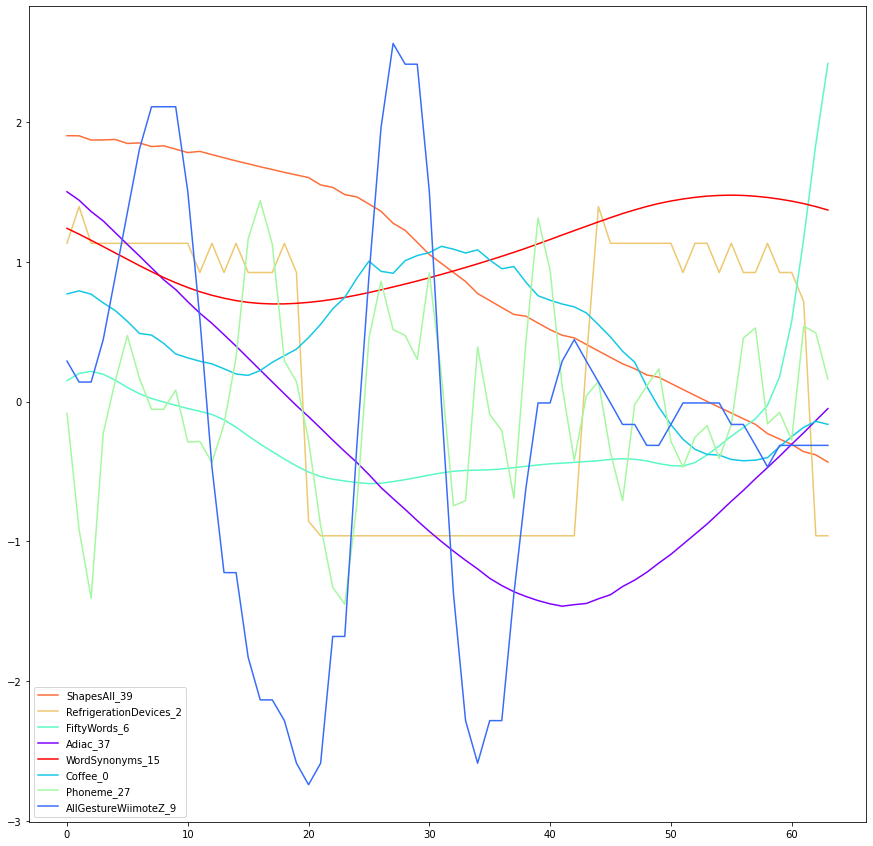

In [8]:
plot(X_batch, y_batch)
plt.legend(y_batch.ravel())

# Balanced classes

In [9]:
dummy_generator = ConstantLengthDataGenerator(X, y, batch_size=8, max_length=1)
classes = []
for i in range(5000):
    _, y = next(dummy_generator)
    classes += y.ravel().tolist()

counts = Counter(classes)
counts

Counter({'NonInvasiveFetalECGThorax2_32': 35,
         'Phoneme_23': 40,
         'PigArtPressure_52': 37,
         'PigCVP_43': 35,
         'CricketX_1': 43,
         'NonInvasiveFetalECGThorax2_33': 34,
         'PigCVP_12': 38,
         'WordSynonyms_14': 35,
         'GestureMidAirD1_21': 38,
         'MelbournePedestrian_3': 34,
         'GestureMidAirD1_25': 36,
         'ShapesAll_44': 29,
         'FiftyWords_1': 26,
         'NonInvasiveFetalECGThorax1_25': 45,
         'FaceAll_4': 28,
         'FiftyWords_44': 39,
         'FaceAll_2': 32,
         'NonInvasiveFetalECGThorax1_3': 32,
         'Wine_1': 37,
         'Lightning7_5': 27,
         'AllGestureWiimoteX_7': 35,
         'FacesUCR_9': 32,
         'ShapesAll_58': 34,
         'ShapesAll_29': 47,
         'NonInvasiveFetalECGThorax1_1': 45,
         'SwedishLeaf_3': 47,
         'GestureMidAirD2_8': 37,
         'GesturePebbleZ2_2': 42,
         'GestureMidAirD1_13': 31,
         'PickupGestureWiimoteZ_8': 33,
     

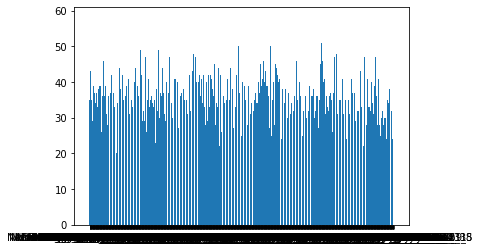

In [10]:
_ = plt.bar(*zip(*counts.items()))